# Section 5.1 — Introduction to Bayesian statistics

This notebook contains the code examples from [Section 5.1 Introduction to Bayesian statistics]() from the **No Bullshit Guide to Statistics**.

#### Notebook setup

In [1]:
# load Python modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Figures setup
plt.clf()  # needed otherwise `sns.set_theme` doesn"t work
from plot_helpers import RCPARAMS
RCPARAMS.update({"figure.figsize": (5, 3)})   # good for screen
# RCPARAMS.update({"figure.figsize": (5, 1.6)})  # good for print
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc=RCPARAMS,
)

# High-resolution please
%config InlineBackend.figure_format = "retina"

# Where to store figures
DESTDIR = "figures/bayes/intro"

<Figure size 640x480 with 0 Axes>

In [3]:
# set random seed for repeatability
np.random.seed(42)
#######################################################

In [4]:
from ministats.utils import savefigure

## Definitions

## Bayesian inference

### Bayesian updating of posterior probabilities

Saved figure to figures/bayes/intro/prior_times_likelihood_eq_posterior.pdf
Saved figure to figures/bayes/intro/prior_times_likelihood_eq_posterior.png


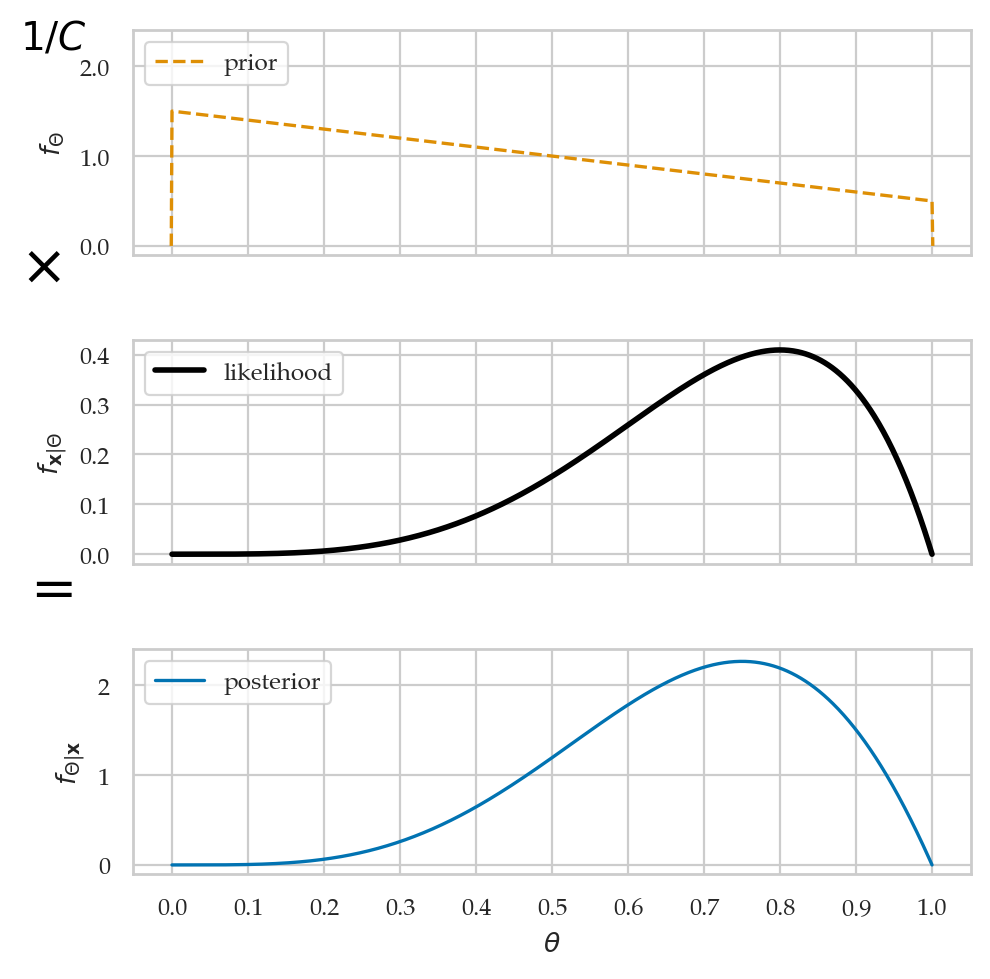

In [5]:
from scipy.stats import binom

heads = 4
n = 5

with plt.rc_context({"figure.figsize":(5,5)}):
    fig, axs = plt.subplots(3, 1, sharex=True)
    eps = 0.001
    ps = np.linspace(0-eps, 1.0+eps, 1000)

    # prior (slightly sloped uniform)
    slope = -1
    prior = np.ones_like(ps) - slope/2 + slope*ps
    prior[(ps < 0) | (ps > 1)] = 0
    sns.lineplot(x=ps, y=prior, ax=axs[0], color="C1", ls="--", label="prior")
    axs[0].set_ylabel("$f_{\\Theta}$")
    axs[0].set_ylim([-0.1,2.4])
    axs[0].set_yticks([0.0,1.0,2.0])
    axs[0].set_yticklabels([0.0,1.0,2.0])
    axs[0].legend(loc="upper left")
    
    # add 1/C at the top
    axs[0].text(-0.2, 2.2, r"$1/C$", size=14, color="black")
    # add x in between
    axs[0].text(-0.2, -0.4, "$\\times$", size=20, color="black")

    # likelihood
    likelihood = binom(n, p=ps).pmf(heads)
    sns.lineplot(x=ps, y=likelihood, ax=axs[1], lw=2, color="black", label="likelihood")
    axs[1].set_ylabel("$f_{\\mathbf{x}|\\Theta}$")
    axs[1].set_yticks([0.0, 0.1, 0.2, 0.3, 0.4])

    # add = in between
    axs[1].text(-0.2, -0.1, "$=$", size=20, color="black")

    # posterior
    numerator = likelihood * prior
    posterior = numerator / np.nansum(numerator) / (ps[1]-ps[0])
    sns.lineplot(x=ps, y=posterior, ax=axs[2], color="C0", label="posterior")
    axs[2].set_ylabel("$f_{\\Theta|\\mathbf{x}}$")
    axs[2].set_xlabel("$\\theta$")
    axs[2].set_xticks(np.linspace(0,1,11))
    axs[2].set_ylim([-0.1,2.4])
    axs[2].legend(loc="upper left")

    filename = os.path.join(DESTDIR, "prior_times_likelihood_eq_posterior.pdf")
    savefigure(fig, filename)

### Grid approximaiton

Saved figure to figures/bayes/intro/prior_times_likelihood_eq_posterior_grid.pdf
Saved figure to figures/bayes/intro/prior_times_likelihood_eq_posterior_grid.png


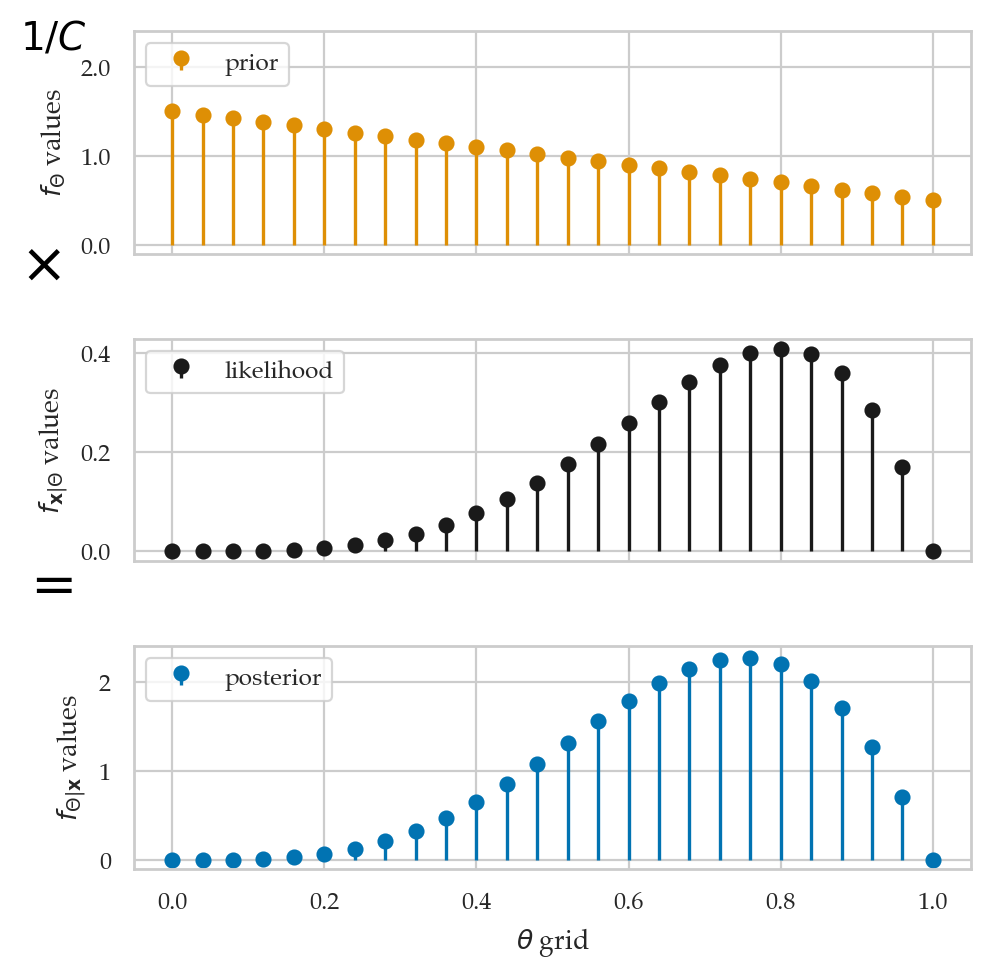

In [6]:
from scipy.stats import binom

heads = 4
n = 5

with plt.rc_context({"figure.figsize":(5,5)}):
    fig, axs = plt.subplots(3, 1, sharex=True)

    # grid
    ps = np.linspace(0, 1, 26)

    # prior values
    slope = -1
    prior = np.ones_like(ps) - slope/2 + slope*ps
    axs[0].stem(ps, prior, basefmt=" ", linefmt="C1-", label="prior")
    axs[0].set_ylabel("$f_{\\Theta}$ values")
    axs[0].set_ylim([-0.1,2.4])
    axs[0].set_yticks([0.0,1.0,2.0])
    axs[0].set_yticklabels([0.0,1.0,2.0])
    axs[0].legend(loc="upper left")

    # add 1/C at the top
    axs[0].text(-0.2, 2.2, r"$1/C$", size=14, color="black")
    # add x in between
    axs[0].text(-0.2, -0.4, "$\\times$", size=20, color="black")
    
    # likelihood values
    likelihood = binom(n, p=ps).pmf(heads)
    axs[1].stem(ps, likelihood, basefmt=" ", linefmt="k", label="likelihood")
    axs[1].set_ylabel("$f_{\\mathbf{x}|\\Theta}$ values")
    axs[1].legend(loc="upper left")

    # add = in between
    axs[1].text(-0.2, -0.1, "$=$", size=20, color="black")

    # posterior values
    numerator = likelihood * prior
    posterior = numerator / np.nansum(numerator) / (ps[1]-ps[0])
    axs[2].stem(ps, posterior, basefmt=" ", linefmt="C0-", label="posterior")
    axs[2].set_ylabel("$f_{\\Theta|\\mathbf{x}}$ values")
    axs[2].set_xlabel("$\\theta$ grid")
    axs[2].set_ylim([-0.1,2.4])
    axs[2].legend(loc="upper left")

    filename = os.path.join(DESTDIR, "prior_times_likelihood_eq_posterior_grid.pdf")
    savefigure(fig, filename)

In [7]:
# inspect values in each array
prior[0:5], likelihood[0:4], posterior[0:5]

(array([1.5 , 1.46, 1.42, 1.38, 1.34]),
 array([0.00000e+00, 1.22880e-05, 1.88416e-04, 9.12384e-04]),
 array([0.        , 0.00013735, 0.00204833, 0.00963941, 0.02823761]))

## Bayesian inference results

Saved figure to figures/bayes/intro/posterior_visualization.pdf
Saved figure to figures/bayes/intro/posterior_visualization.png


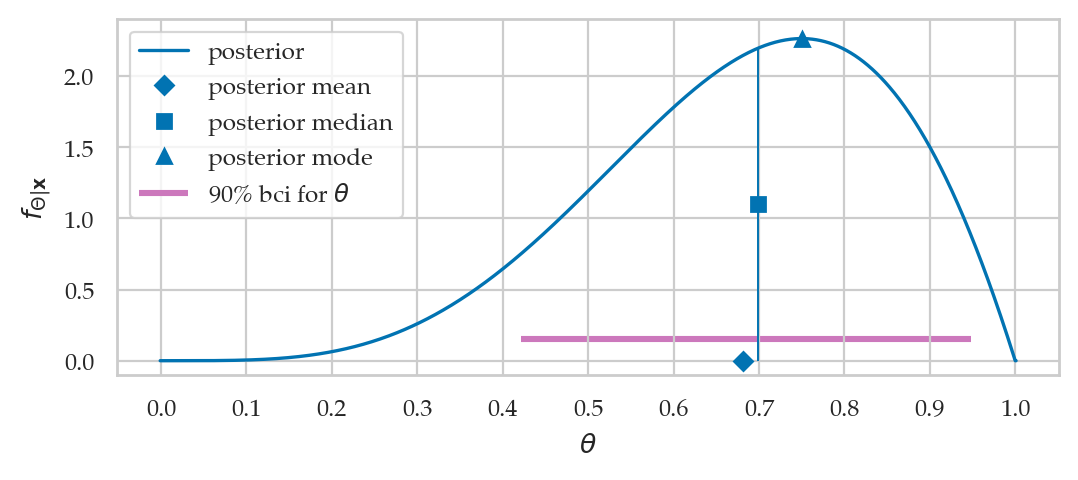

In [8]:
from ministats.hpdi import hpdi_from_grid


heads = 4
n = 5

eps = 0.001
ps = np.linspace(0-eps, 1.0+eps, 1000)


# prior (slightly sloped uniform)
slope = -1
prior = np.ones_like(ps) - slope/2 + slope*ps
prior[(ps < 0) | (ps > 1)] = 0
# likelihood
likelihood = binom(n, p=ps).pmf(heads)
likelihood[np.isnan(likelihood)] = 0
# posterior
numerator = likelihood * prior
posterior = numerator / np.sum(numerator)

# calculate mean, median, mode
pmean = np.sum(ps*posterior)
pmedian = ps[np.cumsum(posterior).searchsorted(0.5)]
pmode = ps[np.argmax(posterior)]
bci90 = hpdi_from_grid(ps, posterior, hdi_prob=0.9)

with plt.rc_context({"figure.figsize":(5.5,2.5)}):

    # plot the posteior
    porteriord = posterior / (ps[1] - ps[0])
    ax = sns.lineplot(x=ps, y=porteriord, color="C0", label="posterior")
    ax.set_ylabel("$f_{\\Theta|\\mathbf{x}}$")
    ax.set_xlabel("$\\theta$")
    ax.set_xticks(np.linspace(0,1,11))
    ax.set_ylim([-0.1,2.4])

    # add mean marker
    ax.plot(pmean, 0, marker="D", color="C0", ls=" ", label="posterior mean")
    # add median line
    post_at_median = porteriord[np.nancumsum(posterior).searchsorted(0.5)]
    ax.vlines(x=pmedian, ymin=0, ymax=post_at_median, color="C0", lw=0.7)
    ax.plot(pmedian, post_at_median/2, marker="s", color="C0", ls=" ", label="posterior median")
    # add mode marker
    ax.plot(pmode, np.nanmax(porteriord), marker="^", color="C0", ls=" ", label="posterior mode")
    # plot 90% credible interval
    ax.hlines(0.15, bci90[0], bci90[1], color="C4", lw=2.2, zorder=0, label="90% bci for $\\theta$")
    ax.legend()
    
    filename = os.path.join(DESTDIR, "posterior_visualization.pdf")
    savefigure(plt.gcf(), filename)

In [9]:
bci90

[0.42126426426426417, 0.9478408408408405]

### Point estimates

In [10]:
# posterior mean
np.nansum(ps*posterior)

0.6818176817107525

In [11]:
# posterior median
cumsum = np.nancumsum(posterior) 
ps[cumsum.searchsorted(0.5)]

0.6990960960960959

In [12]:
# posterior mode
ps[np.nanargmax(posterior)]

0.7502492492492491

### Bayesian credible intervals

In [13]:
from arviz.stats import hdi
post = np.random.choice(ps, size=10000, p=posterior)
hdi(post, hdi_prob=0.9)

array([0.41424324, 0.93981682])

In [14]:
hpdi_from_grid(ps, posterior, hdi_prob=0.9)

[0.42126426426426417, 0.9478408408408405]

### Bayesian predictions

In [15]:
from scipy.stats import bernoulli

np.random.seed(43)

ctoss_preds = []
for i in range(20):
    p_post = np.random.choice(ps, size=1, p=posterior)
    ctoss_pred = bernoulli(p=p_post).rvs(1)[0]
    ctoss_preds.append(ctoss_pred)
ctoss_preds

[1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0]

In [16]:
# # ALT. using scipy.stats vectorized params
# np.random.seed(42)
# m = 20
# ps_post = rvPpost.rvs(m)
# ctoss_preds = bernoulli(p=ps_post).rvs(m)
# ctoss_preds

## TMP stuff (CUT ME)

## Example 1: estimating the probability of a biased coin

The model is

$$
    C \sim \textrm{Bernoulli}(p)
    \qquad
    p \sim \mathcal{U}(0,1).
$$

In [17]:
# Sample of coin tosses observations (1=heads 0=tails)
# We assume they come from a Bernoulli distribution
ctosses = [1,1,0,0,1,0,1,1,1,1,1,0,1,1,0,0,0,1,1,1,
           1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0,1,0,
           0,1,0,1,0,1,0,1,1,0]

sum(ctosses), len(ctosses), sum(ctosses)/len(ctosses)

(34, 50, 0.68)

### Step 1: define a grid of possible parameter values

Define a grid of possible values for the parameter `p`.

In [18]:
ngrid1 = 101             # number of points in the grid
ps = np.linspace(0, 1, ngrid1) # [0, 0.01, ..., 1.0]
ps[0:5]

array([0.  , 0.01, 0.02, 0.03, 0.04])

### Step 2: Define a flat prior distribution

In [19]:
# 2. Define a flat prior distribution
from scipy.stats import uniform
prior1 = uniform(0,1).pdf(ps)
prior1[0:5]

array([1., 1., 1., 1., 1.])

### Step 3: compute the likelihood

In [20]:
# 3. Compute the likelihood of `ctosses` for all `ps`
from scipy.stats import bernoulli
likelihood1 = np.ones(ngrid1)
for ctoss in ctosses:
    likelihood_ctoss = bernoulli(p=ps).pmf(ctoss)
    likelihood1 = likelihood1 * likelihood_ctoss
# ALT.
# np.prod(bernoulli(p=ps[:,np.newaxis]).pmf(ctosses), axis=1)
likelihood1[0:101:25]

# list(map(lambda x: float("{:1.3g}".format(x)), likelihood1[0:101:25]))

array([0.00000000e+00, 3.39578753e-23, 8.88178420e-16, 1.31559767e-14,
       0.00000000e+00])

### Step 4: calculate the numerator in Bayes' formula

In [21]:
# 4. Calculate the numerator in Bayes' formula
numerator1 = likelihood1 * prior1
numerator1[0:101:25]
# list(map(lambda x: float("{:1.3g}".format(x)), numerator1[0:101:25]))

array([0.00000000e+00, 3.39578753e-23, 8.88178420e-16, 1.31559767e-14,
       0.00000000e+00])

### Step 5: normalize to obtain the posterior distribution

In [22]:
posterior1 = numerator1 / np.sum(numerator1)
posterior1[0:101:25]
# list(map(lambda x: float("{:1.3g}".format(x)), posterior1[0:101:25]))

array([0.00000000e+00, 8.52710007e-11, 2.23028862e-03, 3.30357328e-02,
       0.00000000e+00])

In [23]:
np.sum(posterior1).round(15)

1.0

### Visualize the posterior

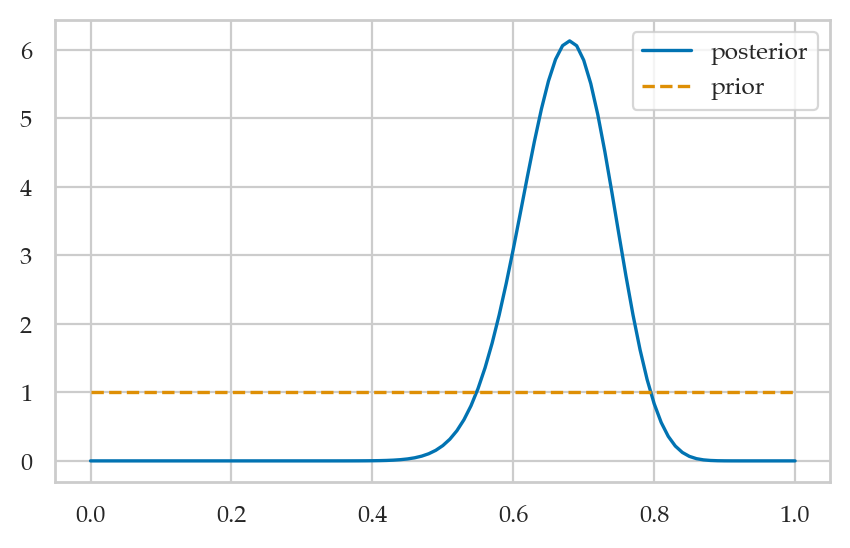

In [24]:
posterior1d = posterior1 / (ps[1] - ps[0])
sns.lineplot(x=ps, y=posterior1d, label="posterior")
sns.lineplot(x=ps, y=prior1, ls="--", label="prior");

Saved figure to figures/bayes/intro/example1_ctosses_prior_and_posterior.pdf
Saved figure to figures/bayes/intro/example1_ctosses_prior_and_posterior.png


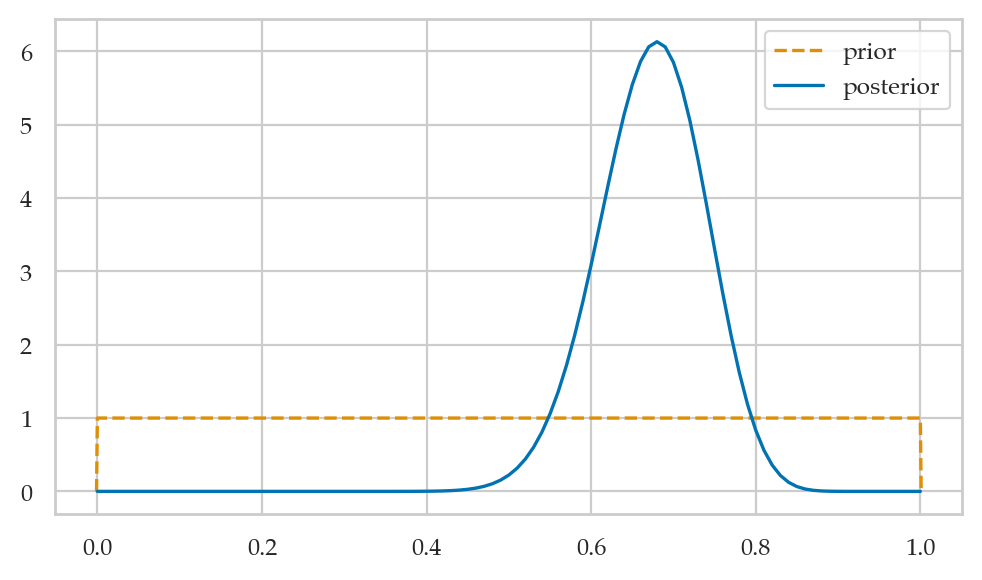

In [25]:
# FIGURES ONLY
psplus = [-0.001] + list(ps) + [1.001]
prior1plus = [0] + list(prior1) + [0]
sns.lineplot(x=psplus, y=prior1plus, ls="--", label="prior", color="C1");
sns.lineplot(x=ps, y=posterior1d, label="posterior", color="C0")

filename = os.path.join(DESTDIR, "example1_ctosses_prior_and_posterior.pdf")
savefigure(plt.gcf(), filename)

### Samples from the posterior

Let's generate some samples from the posterior distribution.

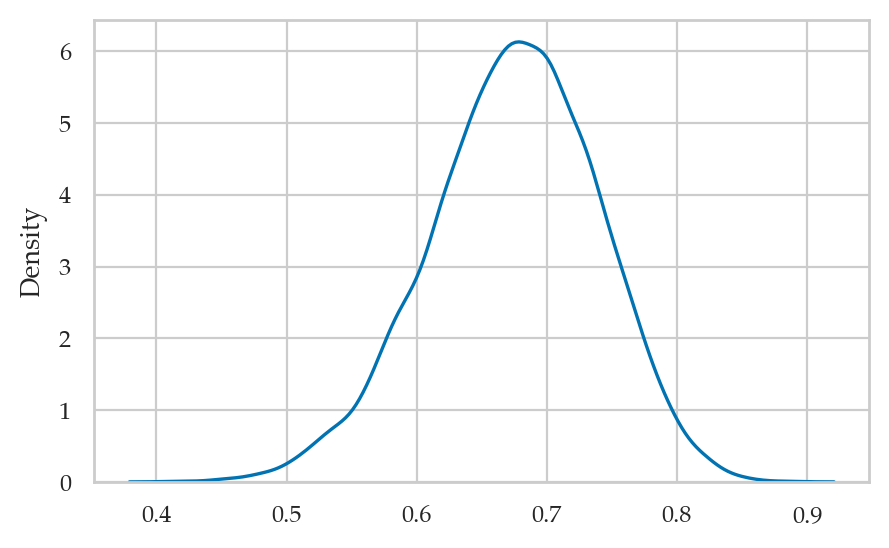

In [26]:
post1 = np.random.choice(ps, size=10_000, replace=True, p=posterior1)
sns.kdeplot(post1);

### Summarize the posterior

We'll learn more about ArviZ later in this notebooks.
It's like the a Swiss Army knife for for summarizing, visualizing, and plotting the Bayesian analysis results.

#### Posterior mean

In [27]:
postmu1 = np.sum(ps * posterior1)
postmu1

0.673076923076923

In [28]:
# ALT. compute the mean of the samples
np.mean(post1)

0.674386

In [29]:
# ALT2. using the `summary` function from the ArviZ library
import arviz as az
az.summary(post1, kind="stats")

,mean,sd,hdi_3%,hdi_97%
x,0.674,0.065,0.54,0.78


The summary also includes the posterior standard deviation
and the limits of a "94\% high density interval" that contains 94\% of the posterior probability density.

#### Posterior standard deviation

In [30]:
poststd2 = np.sum( (ps-postmu1)**2*posterior1 )
poststd = np.sqrt(poststd2)
poststd

0.06443431329777002

In [31]:
# ALT. using the samples from the posterior
poststd2 = 1/len(post1)*np.sum((post1 - postmu1)**2)
poststd = np.sqrt(poststd2)
poststd

0.0646644932431279

#### Posterior median

In [32]:
cumsum1 = np.cumsum(posterior1)
idxMed = cumsum1.searchsorted(0.5)
ps[idxMed]

0.68

In [33]:
np.median(post1)

0.68

#### Posterior quartiles

In [34]:
idxQ1 = cumsum1.searchsorted(0.25)
idxQ2 = cumsum1.searchsorted(0.5)
idxQ3 = cumsum1.searchsorted(0.75)
ps[idxQ1], ps[idxQ2], ps[idxQ3]

(0.63, 0.68, 0.72)

#### Posterior percentiles

In [35]:
idxP03 = cumsum1.searchsorted(0.03)
idxP97 = cumsum1.searchsorted(0.97)
ps[idxP03], ps[idxP97]

(0.55, 0.79)

In [36]:
# ALT. using the `summary` function from the ArviZ library
az.summary(post1, kind="stats", stat_focus="median")

,median,mad,eti_3%,eti_97%
x,0.68,0.04,0.54,0.79


#### Posterior mode

In [37]:
ps[np.argmax(posterior1)]

0.68

In [38]:
# BONUS --- fit a Gaussian KDE curve approx. to the posterior samples `post1`
#           then compute the max of that the KDE curve.
from scipy.stats import gaussian_kde
post1_kde = gaussian_kde(post1)
ps[np.argmax(post1_kde(ps))]

0.68

In [39]:
# ALT2. using a deeply-hidden ArviZ helper function
az.plots.plot_utils.calculate_point_estimate("mode", post1)

0.68140625

Note you will rarely need to call this function like shown above,
since the posterior mean is automatically displayed in ArviZ plots.
More on this coming up soon!
Really cool stuff, but let's stick to numerical summaries
(like the ones we computed in Section 1.3).

### Credible interval

In [40]:
from ministats.hpdi import hpdi_from_grid
hpdi_from_grid(ps, posterior1, hdi_prob=0.9)

[0.54, 0.76]

In [41]:
# ALT. using the `summary` function from the ArviZ library
az.summary(post1, kind="stats", hdi_prob=0.9)

,mean,sd,hdi_5%,hdi_95%
x,0.674,0.065,0.56,0.77


### Predictions

In [42]:
np.random.seed(43)

from scipy.stats import bernoulli

ctoss_preds = []
for i in range(20):
    p_post = np.random.choice(ps, p=posterior1)
    ctoss_pred = bernoulli(p=p_post).rvs(1)[0]
    ctoss_preds.append(ctoss_pred)
ctoss_preds

[0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1]

### Visualizing the posterior updates over time

Saved figure to figures/bayes/intro/panel_coin_posteriors.pdf
Saved figure to figures/bayes/intro/panel_coin_posteriors.png


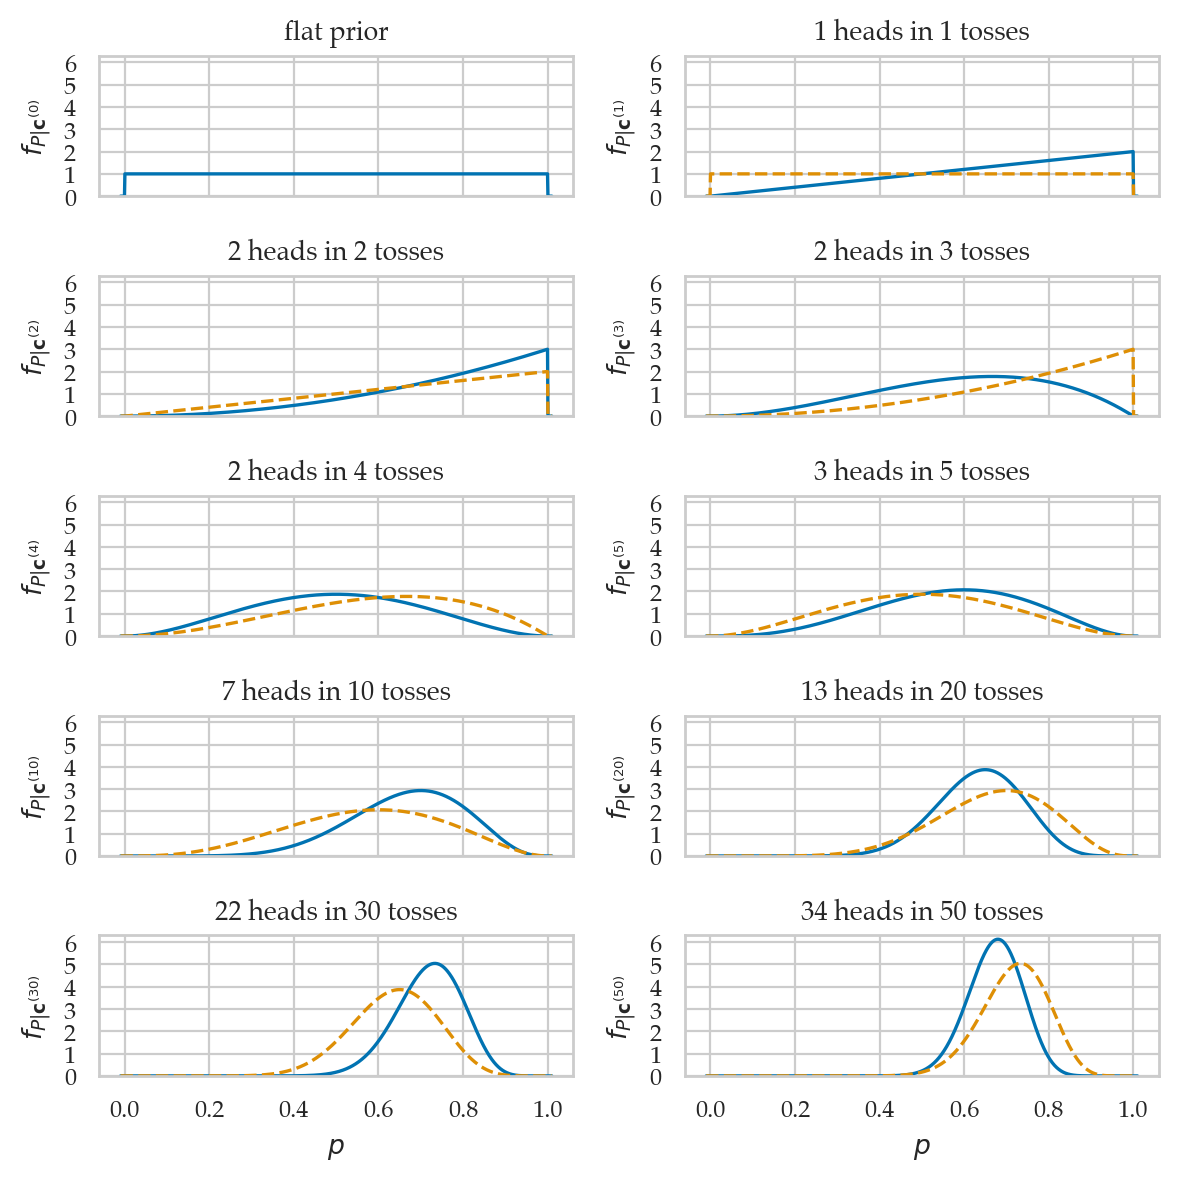

In [43]:
# FIGURES ONLY
from scipy.stats import bernoulli
from scipy.stats import beta
from ministats import plot_pdf

n_rows = 10
ns =       [0, 1, 2, 3, 4, 5, 10, 20, 30,  50]
outcomes = [0, 1, 2, 2, 2, 3,  7, 13, 22,  34]
# outcomes were generated from coin with true p = 0.7
assert len(outcomes) == n_rows
assert len(ns) == n_rows
assert outcomes == [sum(ctosses[:n]) for n in ns]
n_rows = int(len(outcomes))

with plt.rc_context({"figure.figsize":(6,6)}):
    fig, axs_matrix = plt.subplots(n_rows//2, 2, sharex=True)
    axs = [ax for row in axs_matrix for ax in row]
    priorRV = None
    for i, ax in enumerate(axs):
        heads, n = outcomes[i], ns[i]
        rvPpost = beta(a=1+heads, b=1+n-heads)
        plot_pdf(rvPpost, rv_name="P", xlims=[-0.01,1.01], ax=ax)
        if i==0:
            ax.set_title("flat prior")
        else:
            ax.set_title(f"{heads} heads in {n} tosses")
        ax.set_yticks([0,1,2,3,4,5,6])
        # superimpose a plot of the prior as a dashed line
        if priorRV:
            plot_pdf(priorRV, rv_name="P", color="C1", ax=ax, ls="--", xlims=[-0.01,1.01])
        priorRV = rvPpost
        ax.set_ylabel("$f_{P|\\mathbf{c}^{(%i)}}$" % n)
        ax.set_ylim(0,6.3)
    axs[8].set_xlabel("$p$")
    axs[9].set_xlabel("$p$")

    filename = os.path.join(DESTDIR, "panel_coin_posteriors.pdf")
    savefigure(fig, filename)

## Example 2: estimating the IQ score

In [44]:
# Sample of IQ observations
iqs = [ 82.6, 105.5,  96.7,  84.0, 127.2,  98.8,  94.3,
       122.1,  86.8,  86.1, 107.9, 118.9, 116.5, 101.0,
        91.0, 130.0, 155.7, 120.8, 107.9, 117.1, 100.1,
       108.2,  99.8, 103.6, 108.1, 110.3, 101.8, 131.7,
       103.8, 116.4]

We assume the IQ scores come from a population with standard deviation $\sigma = 15$.

### Step 1: define a grid of possible values of the mean

In [45]:
ngrid2 = 1001               # number of points in the grid
mus = np.linspace(80, 120, ngrid2)
mus[0:5]

array([80.  , 80.04, 80.08, 80.12, 80.16])

### Step 2: define the prior for the unknown mean

We'll use a normal centered at 100 with std 40 as the prior


In [46]:
from scipy.stats import norm

mu0 = 100
sigma0 = 40  # very wide standard deviation of the prior
prior2 = norm(loc=mu0, scale=sigma0).pdf(mus)

prior2[0:1001:300]
list(map(lambda x: float("{:1.3g}".format(x)), prior2[0:1001:300]))

[0.0088, 0.00978, 0.00992, 0.00921]

### Step 3: compute the likelihood of the data

In [47]:
sigma = 15  # known population standard deviation

likelihood2 = np.ones(ngrid2)
for iq in iqs:
    likelihood_iq = norm(loc=mus, scale=sigma).pdf(iq)
    likelihood2 = likelihood2 * likelihood_iq

# ALT. one-line computation using NumPy broadcasting rules
# likelihood2 = np.prod(norm(loc=mus[:,np.newaxis], scale=sigma).pdf(iqs), axis=1))

likelihood2[0:1001:300]
# list(map(lambda x: float("{:1.3g}".format(x)), likelihood2[0:1001:300]))

array([1.23613569e-77, 1.80497559e-62, 1.20898934e-55, 3.71466415e-57])

### Steps 4: calculate the numerator in Bayes' rule formula

In [48]:
numerator2 = likelihood2 * prior2

numerator2[0:1001:300]
# list(map(lambda x: float("{:1.3g}".format(x)), numerator2[0:1001:300]))

array([1.08800129e-79, 1.76455630e-64, 1.19977849e-57, 3.41999972e-59])

### Steps 5: normalize to obtain the posterior distribution

In [49]:
# 5. Normalize to obtain the posterior distribution
posterior2 = numerator2 / np.sum(numerator2)

posterior2[0:1001:300]
list(map(lambda x: float("{:1.3g}".format(x)), posterior2[0:1001:300]))

[2.03e-25, 3.29e-10, 0.00224, 6.37e-05]

In [50]:
np.sum(posterior2)

0.9999999999999999

### Visualize the posterior

Saved figure to figures/bayes/intro/example2_iq_prior_and_posterior.pdf
Saved figure to figures/bayes/intro/example2_iq_prior_and_posterior.png


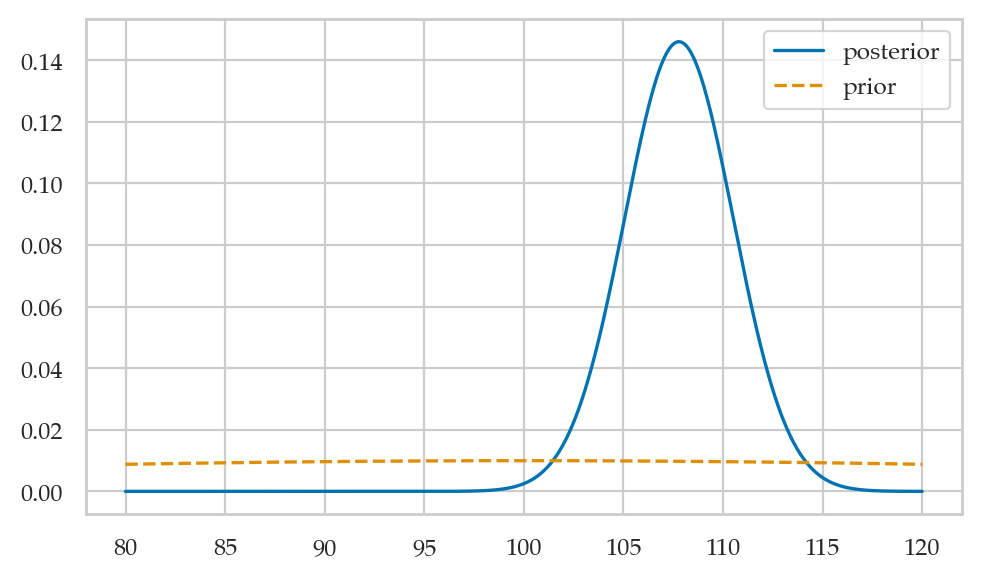

In [51]:
posterior2d = posterior2 / (mus[1] - mus[0])
sns.lineplot(x=mus, y=posterior2d, label="posterior")
sns.lineplot(x=mus, y=prior2, ls="--", label="prior");

# FIGURES ONLY
filename = os.path.join(DESTDIR, "example2_iq_prior_and_posterior.pdf")
savefigure(plt.gcf(), filename)

### Summarize the posterior

#### Posterior mean

In [52]:
np.sum(mus * posterior2)

107.78678422532585

#### Posterior median

In [53]:
cumsum2 = np.cumsum(posterior2)
mus[cumsum2.searchsorted(0.5)]

107.8

#### Posterior mode

In [54]:
mus[np.argmax(posterior2)]

107.8

### Credible interval for the mean

In [55]:
from ministats.hpdi import hpdi_from_grid
hpdi_from_grid(mus, posterior2, hdi_prob=0.9)

[103.16, 112.16]

In [56]:
from ministats import ci_mean
ci_mean(iqs, method="a", alpha=0.1)

[102.83429390645762, 112.81237276020906]

### Predictions

In [57]:
np.random.seed(43)

sigma = 15  # known population standard deviation

iq_preds = []
for i in range(7):
    mu_post = np.random.choice(mus, p=posterior2)
    iq_pred = norm(loc=mu_post, scale=sigma).rvs(1)[0]
    iq_preds.append(iq_pred)
np.round(iq_preds, 2)

array([ 89.64, 110.31, 112.65, 121.25,  92.55, 132.49,  98.97])

### Hypothesis test

In [58]:
mu100 = mus.searchsorted(100)
np.sum(posterior2[0:mu100])

0.0021359730162427413

In [59]:
from scipy.stats import ttest_1samp
tt_res = ttest_1samp(iqs, 100, alternative="greater")
tt_res.statistic, tt_res.pvalue

(2.664408108831371, 0.006232014580899188)

## Explanations

### Grid approximation details

### Choosing priors

In [60]:
from ministats.hpdi import hpdi_from_grid

def get_post_mean_stats(sample, sigma=15, prior_rv=None, ngrid=10001, xlims=[70,130],
                       stats=["mean", "median", "mode", "bci90", "prob_lt_100"]):
    mus = np.linspace(*xlims, ngrid)
    prior = prior_rv.pdf(mus)
    likelihoodsM = norm(loc=mus[:,np.newaxis], scale=sigma).pdf(sample)
    likelihood = np.prod(likelihoodsM, axis=1)
    numerator = likelihood * prior
    posterior = numerator / np.sum(numerator) 

    # compute stats
    results = {}
    if "mean" in stats:
        post_mean = np.sum(mus * posterior)
        results["post mean"] = post_mean
    if "median" in stats:
        cumsum = np.cumsum(posterior)
        post_median = mus[cumsum.searchsorted(0.5)]
        results["post median"] = post_median
    if "mode" in stats:
        post_mode = mus[np.argmax(posterior)]
        results["post mode"] = post_mode
    if "bci90" in stats:
        ci90 = hpdi_from_grid(mus, posterior, hdi_prob=0.9)
        results["bci90"] = [ci90[0].round(3), ci90[1].round(3)]
    if "prob_lt_100" in stats:
        idx100 = mus.searchsorted(100)
        prob_lt_100 = np.sum(posterior[0:idx100])
        results["prob_lt_100"] = prob_lt_100
    return results

In [61]:
# frequentist summary
from ministats import ci_mean
np.mean(iqs), ci_mean(iqs, alpha=0.1)

(107.82333333333334, [102.83429390645762, 112.81237276020906])

Saved figure to figures/bayes/intro/different_priors_for_example2.pdf
Saved figure to figures/bayes/intro/different_priors_for_example2.png


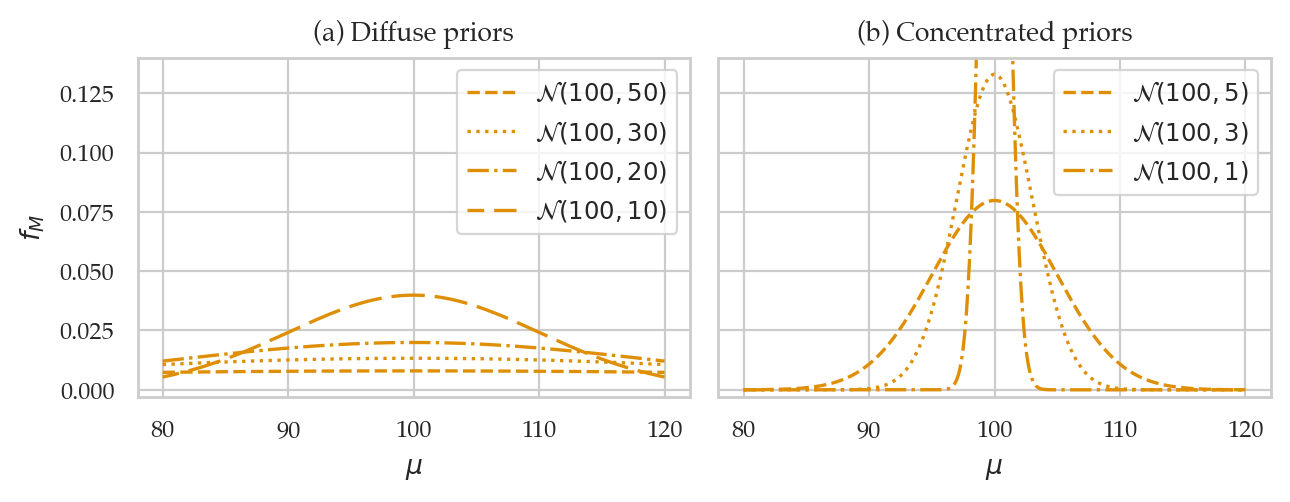

In [62]:
priors = [
    norm(loc=100, scale=50),
    norm(loc=100, scale=30),
    norm(loc=100, scale=20),
    norm(loc=100, scale=10),
    norm(loc=100, scale=5),
    norm(loc=100, scale=3),
    norm(loc=100, scale=1),
]

def get_label(prior):
    mu = str(prior.kwds["loc"])
    sigma = str(prior.kwds["scale"])
    return r"$\mathcal{N}(" + mu + "," + sigma + ")$"


linestyles = ["dashed", "dotted", "dashdot", (5, (10, 3))]
xlims = [80,120]

with plt.rc_context({"figure.figsize":(6.5,2.6)}):
    fig, (ax1,ax2) = plt.subplots(1,2, sharey=True)
    for prior, ls in zip(priors[0:4], linestyles):
        plot_pdf(prior, ax=ax1, ls=ls, color="C1", xlims=xlims, label=get_label(prior))
    for prior, ls in zip(priors[4:], linestyles):
        plot_pdf(prior, ax=ax2, ls=ls, color="C1", xlims=xlims, label=get_label(prior))
    ax1.set_ylim(-0.003, 0.14)
    ax1.set_xlabel(r"$\mu$")
    ax1.set_ylabel(r"$f_M$")
    ax1.set_title("(a) Diffuse priors")
    ax2.set_xlabel(r"$\mu$")
    ax2.set_title("(b) Concentrated priors")

    # FIGURES ONLY
    filename = os.path.join(DESTDIR, "different_priors_for_example2.pdf")
    savefigure(plt.gcf(), filename)

In [63]:
list(zip([1,2,3],[6,8]))

[(1, 6), (2, 8)]

In [64]:
results_list = []
for prior in priors:
    stats = get_post_mean_stats(iqs, prior_rv=prior)
    result = prior.kwds.copy()
    stats["bci90"] = [np.round(stats["bci90"][0], 2), np.round(stats["bci90"][1], 2)]
    result.update(stats)
    results_list.append(result)

results = pd.DataFrame(results_list)
results = results.round({"post mean":2, "post median":2, "post mode":2, "prob_lt_100":5})
results
#print(results.to_latex(index=False,formatters=[lambda x: "$" + str(x) + "$"]*7))

,loc,scale,post mean,post median,post mode,bci90,prob_lt_100
0,100,50,107.80,107.80,107.80,"[103.22, 112.22]",0.00216
1,100,30,107.76,107.76,107.76,"[103.19, 112.16]",0.00221
2,100,20,107.68,107.68,107.68,"[103.16, 112.08]",0.00232
3,100,10,107.28,107.28,107.28,"[102.86, 111.56]",0.00292
4,100,5,106.02,106.02,106.02,"[102.05, 109.95]",0.00609
5,100,3,104.27,104.27,104.27,"[100.92, 107.58]",0.01737
6,100,1,100.92,100.92,100.92,"[99.32, 102.41]",0.16280


## Bayesian hypothesis testing

### Bayesian decision theory

### Bayesian model comparison

TODO: ADD FORMULAS

### Bayes factors

In [65]:
# under H0 = point-prior at mu=100
from scipy.stats import norm

sigma = 15  # known population standard deviation
mlikelihood_H0 = np.prod(norm(loc=100, scale=sigma).pdf(iqs))
mlikelihood_H0

5.415023175654286e-57

We'll set a prior on the effect size $\Delta = \mu / \sigma$,
using the Cauchy distribution (very fat tails).

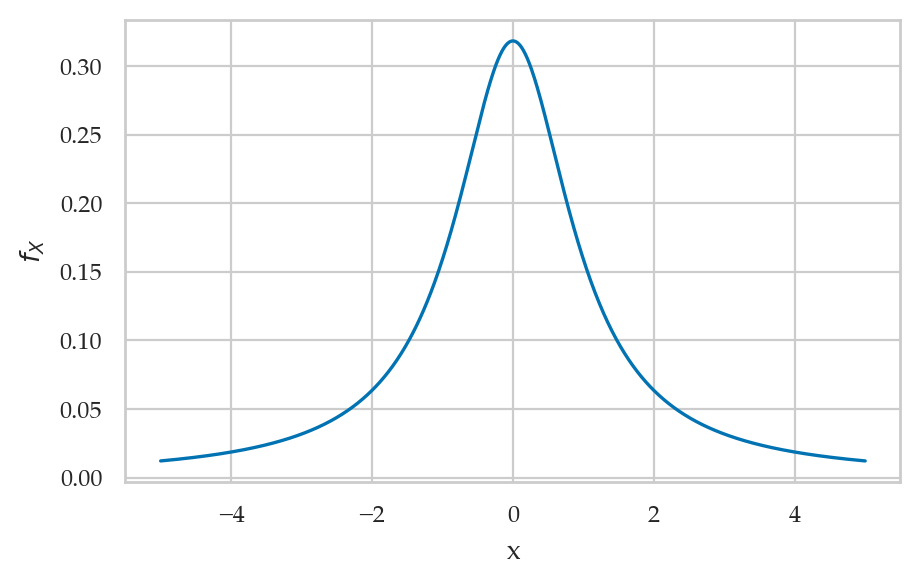

In [66]:
from scipy.stats import cauchy

r = 1  # scale for the Cauchy prior
plot_pdf(cauchy(scale=r), xlims=[-5,5]);

In [67]:
from scipy.integrate import quad

r = 1  # scale for the Cauchy prior
prior_delta = cauchy(scale=r)
delta_max = 10

def integrand(delta):
    # Convert delta into the mean under H1: mu = 100 + delta * sigma
    mu = 100 + delta * sigma
    # Likelihood as the product of normal densities for each observation
    likelihood = np.prod(norm(loc=mu, scale=sigma).pdf(iqs))
    prior = cauchy(loc=0, scale=r).pdf(delta)
    return likelihood * prior

mlikelihood_HA, _ = quad(integrand, -delta_max, delta_max)
print(mlikelihood_HA)

simple_BF_A0 = mlikelihood_HA / mlikelihood_H0
simple_BF_A0

3.647361365721922e-56


6.7356338974139645

In [68]:
mugrid = np.linspace(-50, 250, 1001)

# under HA = diffuse prior
deltas = (mugrid-100) / sigma

prior_rv = cauchy(scale=r) 
prior = prior_rv.pdf(deltas)
norm_const = prior_rv.cdf(10) - prior_rv.cdf(-10)
prior = prior / np.sum(prior) * norm_const

likelihood_HA = np.prod(norm(loc=mugrid[:,np.newaxis], scale=sigma).pdf(iqs), axis=1)
mlikelihood_HA_alt = np.sum(likelihood_HA * prior)
print(mlikelihood_HA_alt)

simple_BF_A0_alt = mlikelihood_HA_alt / mlikelihood_H0
simple_BF_A0_alt

3.649465841847485e-56


6.739520263284058

#### Using the Jeffrey-Zellner-Siow (JZS) prior

In [69]:
import numpy as np
from scipy.stats import norm, cauchy
from scipy.integrate import quad

# finite integration limits to avoid `np.inf`
simgma_max = 50
delta_max = 10

# Known mean under H0
mu_0 = 100

# Scale parameter under H1
r = 0.707  # scale for the Cauchy prior


# Define the marginal likelihood under H0 using Jeffreys prior for sigma
def marginal_likelihood_H0(iqs, mu_0):
    """
    Marginal likelihood under H0 with Jeffreys prior for sigma.
    """
    def integrand(sigma):
        # Likelihood as the product of normal densities for each observation
        likelihood = np.prod(norm.pdf(iqs, loc=mu_0, scale=sigma))
        # ALT.
        # likelihood = np.prod([norm.pdf(iq, loc=mu_0, scale=sigma) for iq in iqs])
        prior = 1 / sigma  # Jeffrey's prior for sigma
        return likelihood * prior

    result, _ = quad(integrand, 0, simgma_max) # limit=1000)
    return result

m0 = marginal_likelihood_H0(iqs, mu_0)
# print(m0)


# Define the marginal likelihood under H1, integrating over delta and sigma
def marginal_likelihood_HA(iqs, mu_0):
    """
    Marginal likelihood under H1 integrating over delta and sigma.
    """
    def integrand(delta, sigma):
        # Convert delta into the mean under H1: mu = mu_0 + delta * sigma
        mu = mu_0 + delta * sigma
        # Likelihood as the product of normal densities for each observation
        likelihood = np.prod(norm.pdf(iqs, loc=mu, scale=sigma))
        # ALT.
        # likelihood = np.prod([norm.pdf(iq, loc=mu, scale=sigma) for iq in iqs])
        prior_delta = cauchy(loc=0, scale=r).pdf(delta)
        prior_sigma = 1 / sigma  # Jeffrey's prior for sigma
        return likelihood * prior_delta * prior_sigma

    # Inner integral sigma for a given delta
    def integrate_delta(delta):
        return quad(lambda sigma: integrand(delta, sigma), 0, simgma_max)[0]

    # Outer integral over delta
    result, _ = quad(integrate_delta, -delta_max, delta_max)
    return result

mA = marginal_likelihood_HA(iqs, mu_0)
# print(mA)

# Compute the Bayes factor
BF_A0 = mA / m0

print(f"Bayes Factor (BF_A0): {BF_A0}")

Bayes Factor (BF_A0): 3.720150734157744


In [70]:
# Bayes factor (based on JZS prior)
import pingouin as pg
pg.ttest(iqs, 100).loc["T-test","BF10"]

'3.74'

In [71]:
# ALT. Bayes factor (based on JZS prior)
n = len(iqs)
tstat = (np.mean(iqs) - 100) / np.std(iqs, ddof=1) * np.sqrt(n)
pg.bayesfactor_ttest(tstat, nx=n)

3.7397058298821895

In [72]:
# verify computation against the R package `BayesFactor`
import rpy2.robjects as robjects
from rpy2.robjects import r as runr, pandas2ri
from rpy2.robjects.packages import importr
pandas2ri.activate()

# import the BayesFactor package
BayesFactor = importr('BayesFactor')

# copy the data sample into the R workspace
robjects.globalenv["iqs"] = np.array(iqs)

# compute the Bayes factor
runr('bf = ttestBF(iqs, mu=100)')
runr('print(bf)')

Bayes factor analysis
--------------
[1] Alt., r=0.707 : 3.739463 ±0%

Against denominator:
  Null, mu = 100 
---
Bayes factor type: BFoneSample, JZS



In [73]:
# Compare to the frequentist result
from scipy.stats import ttest_1samp
ttest_1samp(iqs, popmean=100)

TtestResult(statistic=2.664408108831371, pvalue=0.012464029161798377, df=29)

### Using credible intervals for decisions

In [74]:
bci95 = hpdi_from_grid(mus, posterior2, hdi_prob=0.95)
bci95

[102.32, 113.03999999999999]

In [75]:
bci99 = hpdi_from_grid(mus, posterior2, hdi_prob=0.99)
bci99

[100.68, 114.75999999999999]

### Region of practical equivalence

In [76]:
mu97 = mus.searchsorted(97)
mu103 = mus.searchsorted(103)
np.sum(posterior2[mu97:mu103+1])

0.040481237454239115

## Discussion

### Maximum a posteriori estimates

### Comparing Bayesian and frequentist approaches to statistical inference

### Strengths and weaknesses of Bayesian approach

## Exercises

## Exercise: campaign conversions 

See [explorations/bayesianprobabilitiesworkshop/Exercise%201.ipynb](./explorations/bayesianprobabilitiesworkshop/Exercise%201.ipynb)


### Exercise: Bayes rule for diagnostic test

A group of researchers has designed a new
inexpensive and painless test for detecting lung cancer. The test is
intended to be an initial screening test for the population in
general. A positive result (presence of lung cancer) from the test
would be followed up immediately with medication, surgery or more
extensive and expensive test. The researchers know from their
studies the following facts:

-   Test gives a positive result in $98\%$ of the time when the test
    subject has lung cancer.
-   Test gives a negative result in $96\%$ of the time when the
    test subject does not have lung cancer.
-   In general population approximately one person in 1000 has lung
    cancer.


**a)** The researchers are happy with these preliminary results (about
$97\%$ success rate), and wish to get the test to market as soon as
possible. How would you advise them? Base your answer on Bayes' rule
computations.

HINT: Relatively high false negative (cancer doesn't get
detected) or high false positive (unnecessarily administer
medication) rates are typically bad and undesirable in tests.




Here are some probability values that can help you figure
out if you copied the right conditional probabilities from the
question.

-   P(Test gives positive \| Subject does not have lung cancer) =
    $4\%$
-   P(Test gives positive **and** Subject has lung cancer) =
    $0.098\%$ this is also referred to as the **joint probability**
    of *test being positive* and the *subject having lung cancer*.


* Is p(has cancer|test result is positive) computed using Bayes' formula
(or its complement p(does not have cancer|test result is positive))?
* Is the result p(has cancer|test result is positive)=**...** (or p(does not have cancer|test result
is positive)=**...**)
* Is the result motivated with something like



See here for viz https://sophieehill.shinyapps.io/base-rate-viz/

In [77]:
# In general population approximately one person in 1000 has lung cancer.
prev = 0.001

# Test gives a positive result in 98% of the time when the test subject has lung cancer.
# Sensitivity: the ability of a test to correctly identify patients with a disease.
pPgC = sens = 0.98


# Test gives a negative result in 96% of the time when the test subject does not have lung cancer.
# Specificity: the ability of a test to correctly identify people without the disease.
pNgNC = spec = 0.96

In [78]:
# P(Test gives positive | Subject does not have lung cancer) = 4%
pPgNC = (1-spec)
pPgNC

0.040000000000000036

In [79]:
# P(Test gives positive and Subject has lung cancer) = 0.098%
pPC = sens*prev
pPC

0.00098

In [80]:
pP = prev*sens + (1-prev)*(1-spec)
pP

0.04094000000000004

In [81]:
# Pr(C|P) = Pr(C and P) / Pr(P) 
pCgP      = pPC         / pP
pCgP

0.02393746946751341

In [82]:
# ALT
# Pr(C|P) = Pr(P|C)Pr(C) / Pr(P)
pCgP      = pPgC*prev / pP
pCgP

0.02393746946751341

In [83]:
1 - pCgP

0.9760625305324866


Given the high rate of false-positives 97.6%, I would advise the researchers not to proceed with the screening to the whole population. There will be way too many people scared for nothing.
The test can be used for patients who are suspected they might have lung cancer. In such a sub-population the prevalence would be higher and thus the false-positive rate would decrease.
I would possibly use a visualization tool to illustrate the [base rate fallacy](https://sophieehill.shinyapps.io/base-rate-viz/) problem.


### Exercise: algae

see [assignment2](./explorations/BDA_course/assignment2/assignment2.qmd) from the BDA course

## Links